## Notebook

In [40]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import matplotlib.pylab as plt
import glob
import os
import re

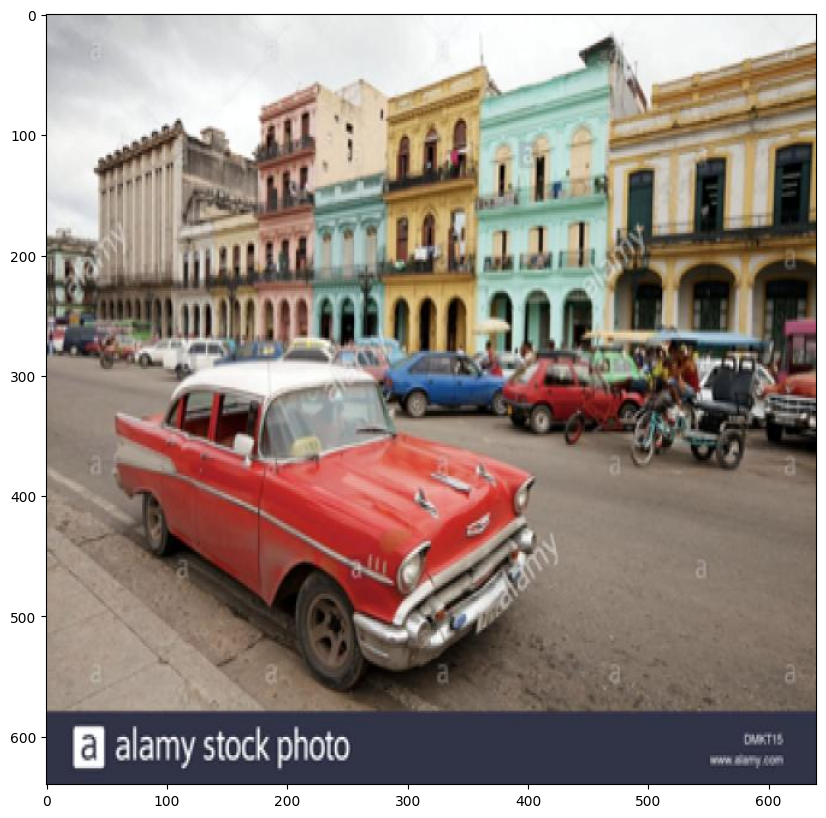

In [41]:
path = os.environ.get('MY_PATH')

subset = glob.glob(path + '/data/train/images/*.jpg')

def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(0)) if match else -1

subset = glob.glob(os.path.join(path, 'data/train/images/*.jpg'))

# Sort the files by the number extracted from the filename
subset = sorted(subset, key=extract_number)

img1 = plt.imread(subset[1]) # image array

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img1)

In [42]:
import cv2
img_cv2 = cv2.imread(subset[1])

Text(0.5, 1.0, 'Matplotlib Image')

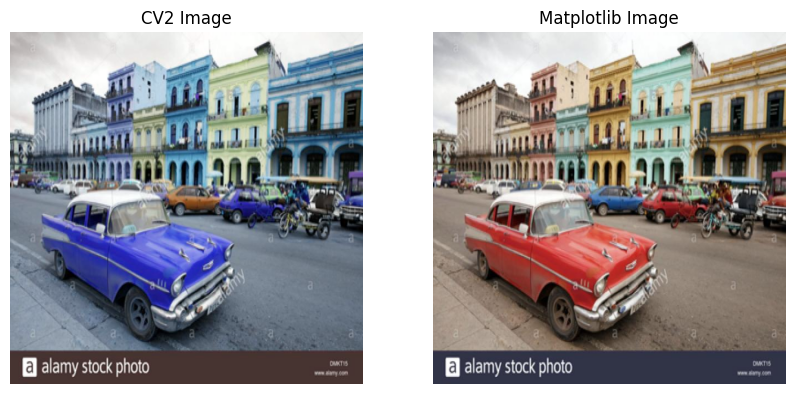

In [43]:
# Visuallising the differences between cv2 and matplotlib libraries (BGR vs RGB)
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].imshow(img_cv2)
axs[1].imshow(img1)

axs[0].axis('off')
axs[1].axis('off')

axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')

Text(0.5, 1.0, 'Matplotlib Image')

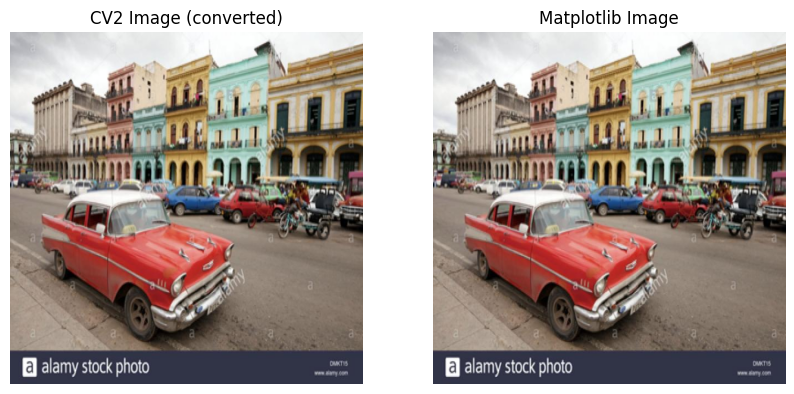

In [44]:
# Converting from BGR to RGB

img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].imshow(img_cv2_rgb)
axs[1].imshow(img1)

axs[0].axis('off')
axs[1].axis('off')

axs[0].set_title('CV2 Image (converted)')
axs[1].set_title('Matplotlib Image')

In [49]:
labels_path = os.path.join(path, 'data', 'train', 'labels', '*.txt')

labels = glob.glob(labels_path)

# Normalize the paths
labels = [os.path.normpath(label) for label in labels]

In [50]:

model = YOLO("yolov8n.yaml")